In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',50)

In [48]:
Protein = pd.read_csv("../input/covid19-healthy-diet-dataset/Protein_Supply_Quantity_Data.csv")
Protein.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0,10.5108,0.4850,8.2146,1.2586,16.0670,7.4349,0.8534,0.7674,0.8841,0.3438,0.4666,0.4113,0.0,0.0000,0.0737,16.8161,0.0430,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [49]:
def missing_values_table(df):# Function to calculate missing values by column# Funct 
    mis_val = df.isnull().sum() # Total missing values
    mis_val_pct = 100 * df.isnull().sum() / len(df)# Percentage of missing values
    mis_val_df = pd.concat([mis_val, mis_val_pct], axis=1)# Make a table with the results
    mis_val_df_cols = mis_val_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})# Rename the columns
    mis_val_df_cols = mis_val_df_cols[mis_val_df_cols.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)# Sort the table by percentage of missing descending
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n" 
           "There are " + str(mis_val_df_cols.shape[0]) + " cols having missing values.")# Print some summary information
    return mis_val_df_cols # Return the dataframe with missing information

In [50]:
missing_values_table(Protein)

Dataframe has 32 columns.
There are 6 cols having missing values.


,Missing Values,% of Total Values
Active,8,4.7
Undernourished,7,4.1
Confirmed,6,3.5
Deaths,6,3.5
Recovered,6,3.5
Obesity,3,1.8


In [51]:
Protein.fillna(0)

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,5.5278,0.5916,0.2034,1.2479,0.1664,0.1941,0.5546,0.0000,0.0000,0.1387,40.2477,0.0000,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,16.4750,1.1084,0.3722,1.4555,0.0000,0.8867,0.2635,0.0000,0.0042,0.2677,22.2552,0.0084,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,8.0616,0.3283,0.1830,2.5509,0.1776,1.4638,0.4628,0.0000,0.0000,0.2745,36.1694,0.0269,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,1.1460,0.8133,2.1534,4.0850,0.0000,5.1941,0.1017,0.0000,0.0092,0.0092,34.7782,0.0092,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0000,10.5108,0.4850,8.2146,1.2586,16.0670,7.4349,0.8534,0.7674,0.8841,0.3438,0.4666,0.4113,0.0000,0.0000,0.0737,16.8161,0.0430,1.6024,0.2947,19.1,0,0.293878,0.007143,0.190816,0.095918,98000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0000,21.6526,0.8707,2.6477,1.0662,11.8347,6.3083,0.7641,0.0444,1.9369,0.0000,1.1195,0.3287,0.0000,0.0178,0.0000,27.4545,0.0533,1.0129,0.0267,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,Vietnam,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,1.0887,1.6442,3.7994,0.9387,0.5221,0.2333,0.5444,0.0167,0.0056,0.3277,29.5617,0.0000,3.7216,0.0389,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,Yemen,0.0000,10.0122,0.0188,0.0000,35.1179,0.4320,0.9392,0.4884,5.9453,1.9630,0.7232,0.2254,2.9398,0.0657,0.2066,0.3193,0.0000,0.0000,0.0188,39.9831,0.0000,0.5448,0.0564,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,Zambia,0.4824,9.8925,0.0338,0.0000,28.5182,0.5839,3.0126,0.0931,4.3158,1.0324,0.9139,8.0562,0.6431,0.0846,1.2863,0.0762,0.0000,0.0000,0.0000,40.1117,0.0000,0.8039,0.0592,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


In [52]:
Protein['Undernourished'].value_counts(dropna=False)

<2.5    44
NaN      7
16.5     3
6.2      3
2.7      3
        ..
12.9     1
29.4     1
7.5      1
7        1
27.9     1
Name: Undernourished, Length: 99, dtype: int64

In [53]:
Protein[Protein['Undernourished']=='<2.5'].shape

(44, 32)

In [54]:
Protein.loc[Protein['Undernourished']=='<2.5','Undernourished'] = '0'
Protein.loc[Protein['Undernourished'].isna(),'Undernourished'] = '0'

In [55]:
Protein['Undernourished'].value_counts(dropna=False)

0       51
16.5     3
6.2      3
7.1      3
2.7      3
        ..
10       1
9.3      1
12.9     1
29.4     1
27.9     1
Name: Undernourished, Length: 98, dtype: int64

In [56]:
Protein[Protein.isna().any(axis=1)]

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
26,Canada,0.3458,25.1828,0.6868,0.0049,12.9249,2.0553,2.8755,0.6868,13.7253,5.7905,0.0445,2.4160,3.7451,0.1532,1.3785,0.6374,0.0000,0.0099,0.5534,24.8172,0.0840,1.5909,0.2915,31.3,0,2.109961,0.054203,1.909848,NaN,38190000.0,%
29,Chile,0.2314,25.6899,0.1016,0.0000,17.7775,1.6141,2.0374,0.4966,16.5077,5.2260,0.1919,0.4571,1.3996,0.0282,1.8285,0.3160,0.0000,0.0000,0.2653,24.3185,0.0169,1.4222,0.0734,28.8,2.7,3.842229,0.097047,3.626194,NaN,19470000.0,%
52,French Polynesia,0.3778,32.9981,0.2042,0.0153,10.7050,1.1741,7.0448,0.3931,18.8677,4.7680,0.9189,1.0618,0.6636,0.0255,0.9036,0.3471,0.0255,0.0000,0.1174,17.0044,0.0153,1.2558,1.1129,NaN,4.2,NaN,NaN,NaN,NaN,280000.0,%
80,Kiribati,0.0338,24.9594,0.0473,0.0000,15.3680,0.4058,16.1052,0.9131,7.6502,0.6020,0.1488,4.1328,0.0203,0.0203,2.6583,0.0676,0.0000,0.0000,0.3179,25.0338,0.0000,1.3731,0.1420,45.6,2.7,NaN,NaN,NaN,NaN,125000.0,%
81,"Korea, North",0.0287,10.0832,0.0000,0.0000,23.9070,1.3872,2.9561,0.6218,5.0990,0.3348,0.3061,1.8464,6.2757,0.0000,2.4873,0.0287,0.0000,0.0000,0.0574,39.9120,0.0000,4.6398,0.0287,7.1,47.8,NaN,NaN,NaN,NaN,25779000.0,%
105,Myanmar,0.0161,23.9286,0.0911,0.0000,16.0006,0.8517,8.7797,0.4018,10.2743,3.2248,0.6964,1.6285,4.5961,0.4339,0.2786,0.3107,0.0000,0.2625,0.2464,26.0767,0.0000,1.8213,0.0804,5.7,10.6,NaN,NaN,NaN,NaN,54704000.0,%
109,New Caledonia,0.3262,29.1790,0.1873,0.0181,13.6531,1.6915,3.9207,0.6585,15.3749,7.2857,0.7008,1.2143,0.5739,0.0967,0.7431,0.4591,0.0000,0.0000,0.1087,20.8240,0.0362,1.7640,1.1841,NaN,7.1,NaN,NaN,NaN,NaN,295000.0,%
147,Taiwan*,0.2391,24.7580,0.0350,0.0175,12.9738,2.4082,4.5073,0.7813,14.7930,2.4431,0.5598,6.0058,0.9329,0.2041,0.2391,0.3557,0.0117,0.0000,0.5364,25.2362,0.0058,2.8571,0.0991,NaN,3.5,0.003914,0.000038,0.003571,0.000305,23610000.0,%
155,Turkmenistan,0.0000,21.5563,0.0485,0.0000,24.3242,1.1201,0.4685,0.4254,12.3586,7.3613,0.1992,0.1992,0.4739,0.0054,0.7485,0.2746,0.0000,0.0000,0.0592,28.4437,0.0162,1.8255,0.0915,17.5,5.4,NaN,NaN,NaN,NaN,6031000.0,%


In [57]:
dropcols = Protein.columns[-6:].tolist() + ['Obesity']
dropcols

['Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'Population',
 'Unit (all except Population)',
 'Obesity']

In [58]:
Protein.shape

(170, 32)

In [59]:
Protein = Protein.drop(dropcols, axis=1)
Protein.shape

(170, 25)

In [60]:
def correlation_heatmap(df,size=(30,30)):
    _ , ax = plt.subplots(figsize = size)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':9 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [61]:
Protein['Undernourished'] = Protein['Undernourished'].astype(float)

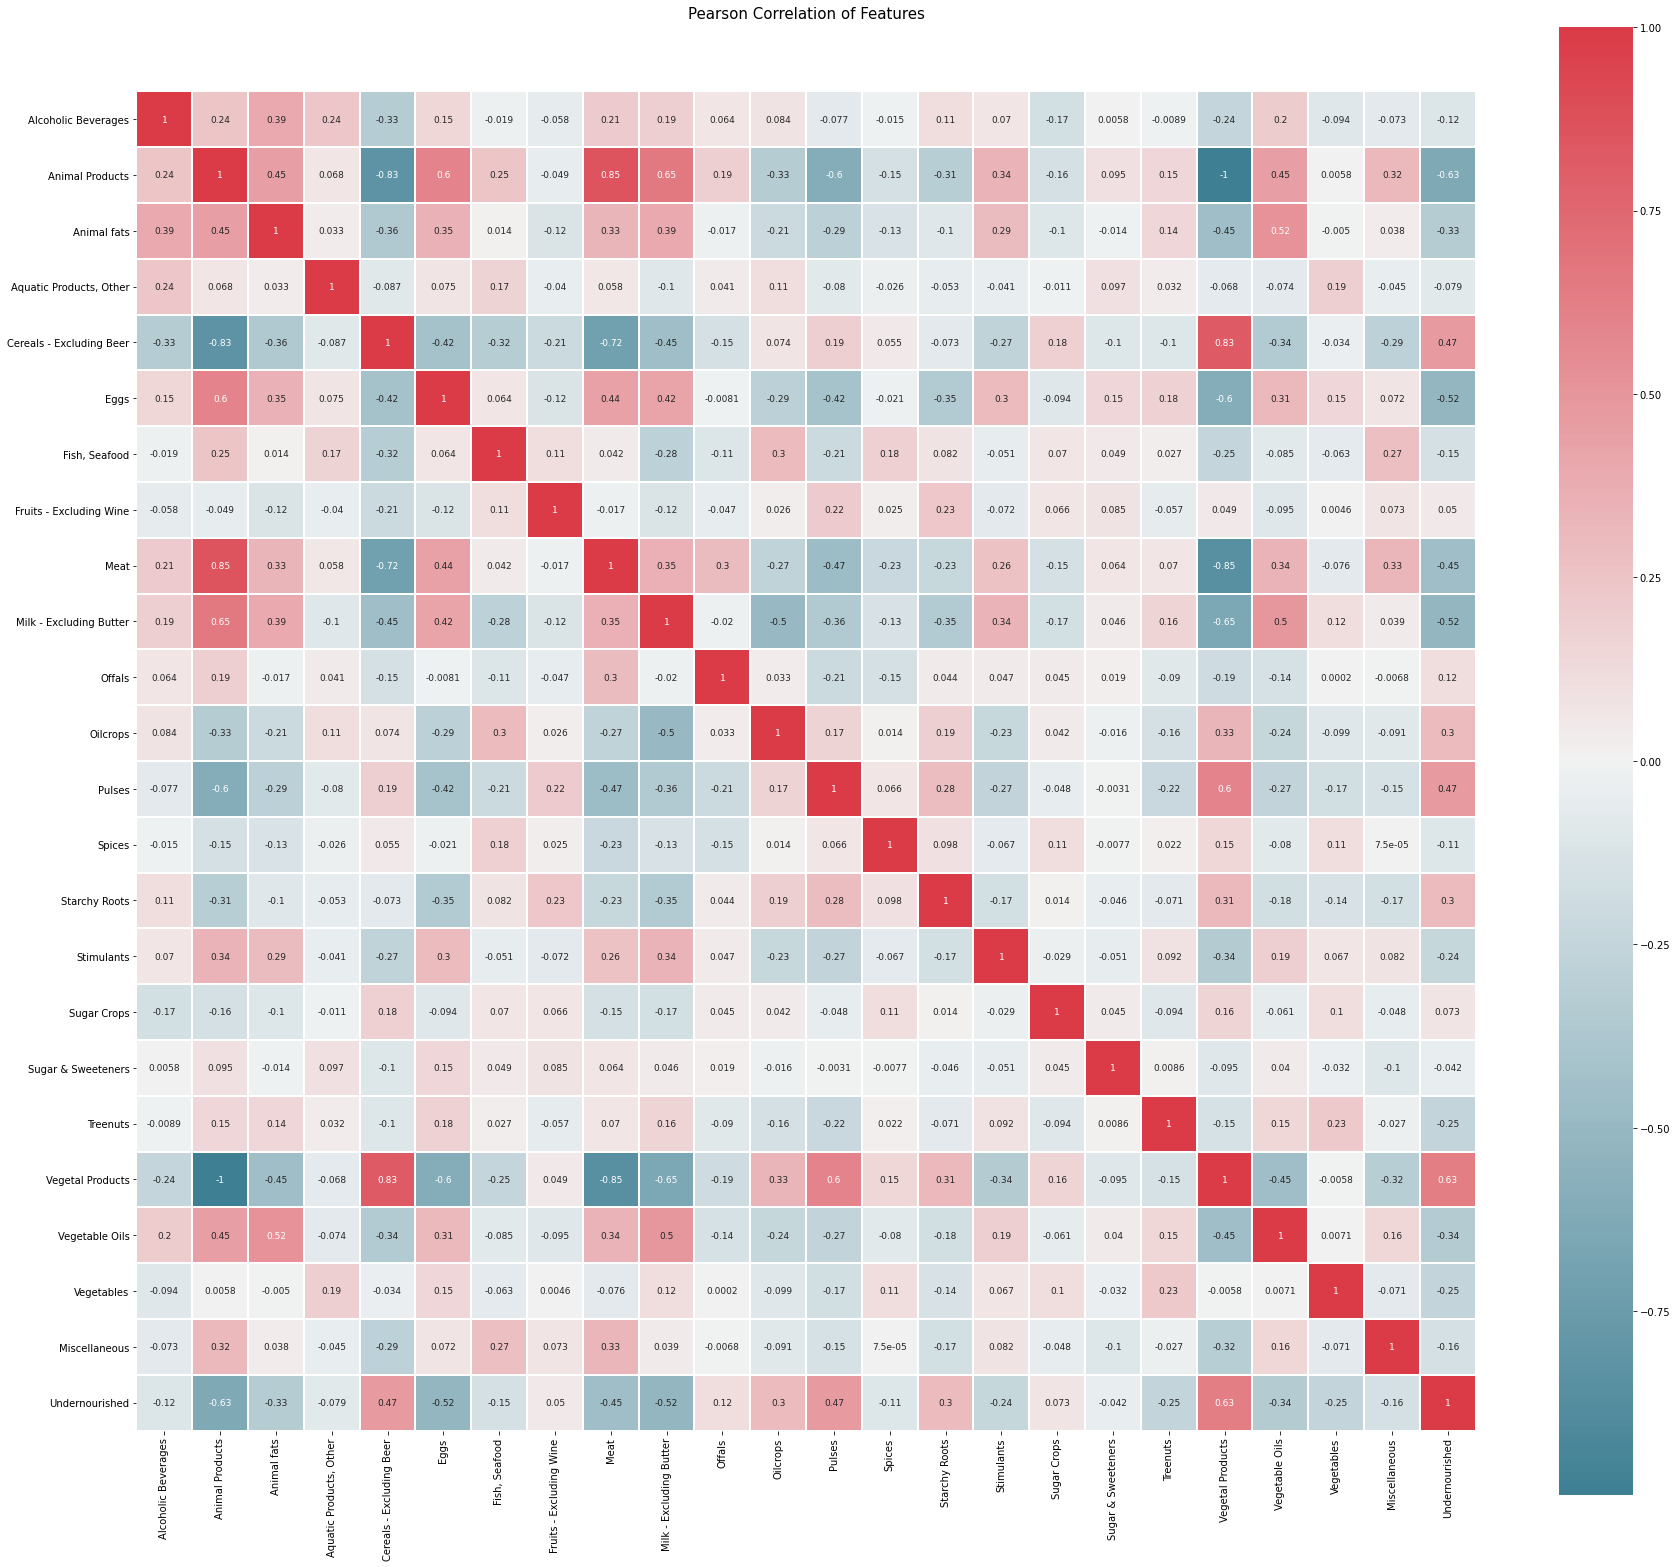

In [62]:
correlation_heatmap(Protein,size=(30,30))

# Protein & Undernourished

In [63]:
def corr_heatmap(df,size=(30,30)):
    _ , ax = plt.subplots(figsize = size)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':25 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

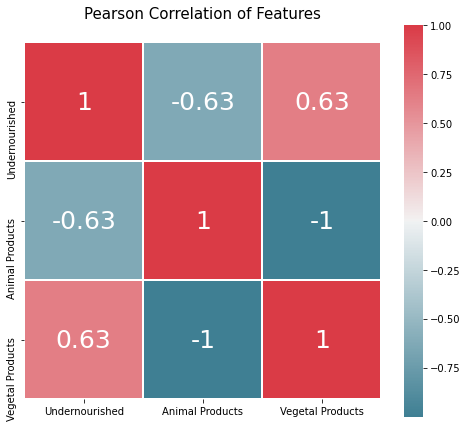

In [64]:
corr_heatmap(Protein[['Undernourished','Animal Products','Vegetal Products']],size=(8,8))

## Top 5 corr with Undernourished

In [75]:
display(Protein.corr()['Undernourished'].sort_values()[:5])
neg = Protein.corr()['Undernourished'].sort_values()[:5].index.tolist()

Animal Products           -0.627983
Eggs                      -0.519312
Milk - Excluding Butter   -0.517446
Meat                      -0.447372
Vegetable Oils            -0.337666
Name: Undernourished, dtype: float64

In [77]:
display(Protein.corr()['Undernourished'].sort_values()[-6:-1])
pos = Protein.corr()['Undernourished'].sort_values()[-6:-1].index.tolist()

Oilcrops                    0.302025
Starchy Roots               0.303358
Cereals - Excluding Beer    0.473023
Pulses                      0.473771
Vegetal Products            0.627928
Name: Undernourished, dtype: float64

In [78]:
scatter_cols = neg + pos
scatter_cols

['Animal Products',
 'Eggs',
 'Milk - Excluding Butter',
 'Meat',
 'Vegetable Oils',
 'Oilcrops',
 'Starchy Roots',
 'Cereals - Excluding Beer',
 'Pulses',
 'Vegetal Products']

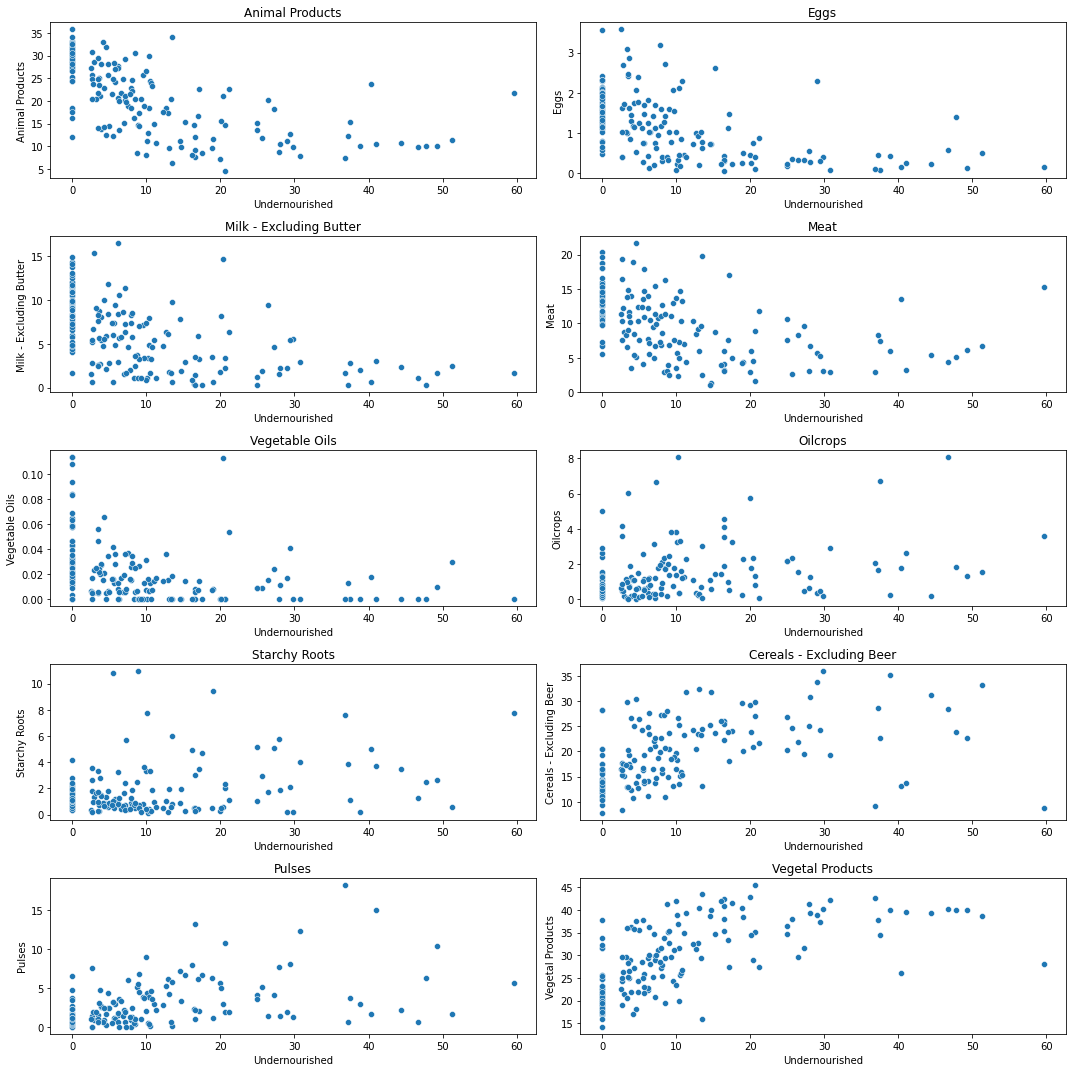

<Figure size 432x288 with 0 Axes>

In [81]:
# count=1
plt.subplots(figsize=(15, 15))
for i,c in enumerate(scatter_cols):
#     print(count)
    plt.subplot(5,2,i+1)
    sns.scatterplot(data=Protein, x='Undernourished',y=c)
    plt.title(c)
    plt.tight_layout()
    
plt.show()
plt.savefig('fig.jpg')